#### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

#### Membaca file .csv

In [2]:
df = pd.read_csv("bakery.csv")
df.head(10)

,transaction_id,transaction_date,customer_name,transaction_amount,item_name,payment_method,customer_rating,bread_rating
0,1,01-11-2023,John Doe,25.0,Croissant,credit card,8,9
1,2,01-11-2023,Jane Smith,10.5,Baguette,cash,7,8
2,3,02-11-2023,Bob Johnson,15.0,Cinnamon Roll,credit card,9,7
3,4,03-11-2023,Alice Williams,8.0,Cinnamon Roll,cash,6,9
4,5,03-11-2023,Charlie Brown,12.0,Croissant,credit card,8,8
5,6,04-11-2023,David Wilson,30.0,Cinnamon Roll,cash,7,9
6,7,04-11-2023,Emma Davis,20.0,Whole Wheat Bread,credit card,9,8
7,8,05-11-2023,George Thompson,5.5,Cinnamon Roll,cash,6,7
8,9,05-11-2023,Olivia Martin,18.0,Croissant,credit card,8,9
9,10,06-11-2023,Samuel Moore,7.0,Shortbread Cookie,cash,7,8


#### Line plot jumlah nilai transaksi per hari

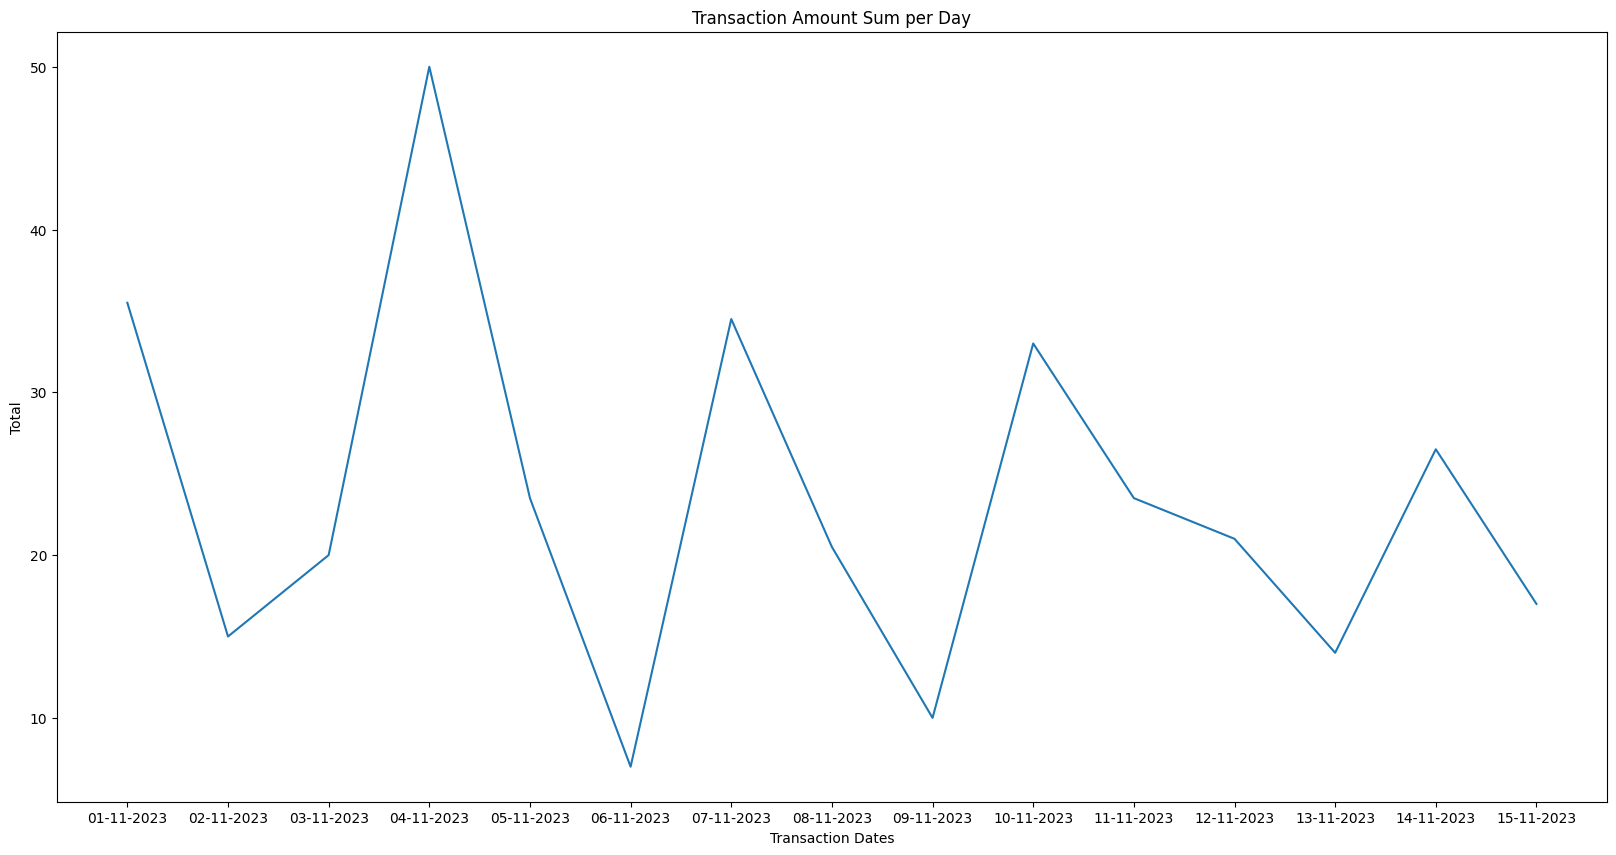

In [3]:
df.set_index("transaction_id")
sum_transaction_date = df.groupby(["transaction_date"]).sum(numeric_only=True)
transaction_dates = sum_transaction_date.index.get_level_values(0).tolist()
amount_sum = sum_transaction_date["transaction_amount"]

plt.figure(figsize=(20, 10))
plt.title("Transaction Amount Sum per Day")
plt.xlabel("Transaction Dates")
plt.ylabel("Total")
plt.plot(transaction_dates, amount_sum)
plt.show()

#### Pie chart 5 roti yang paling sering dipesan

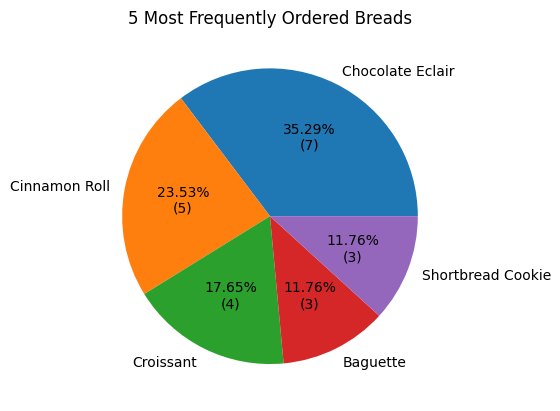

In [4]:
top_five_breads = df["item_name"].value_counts().nlargest(5)
breads = top_five_breads.index.get_level_values(0).tolist()
frequencies = top_five_breads.values.tolist()



plt.title("5 Most Frequently Ordered Breads")
plt.pie(
   frequencies,
   labels=breads,
   autopct=lambda pct: f'{pct:.2f}%\n({math.ceil(pct/100.*sum(frequencies))})'
)
plt.show()

#### Line plot rata-rata kepuasan pelanggan (customer_rating) per hari.

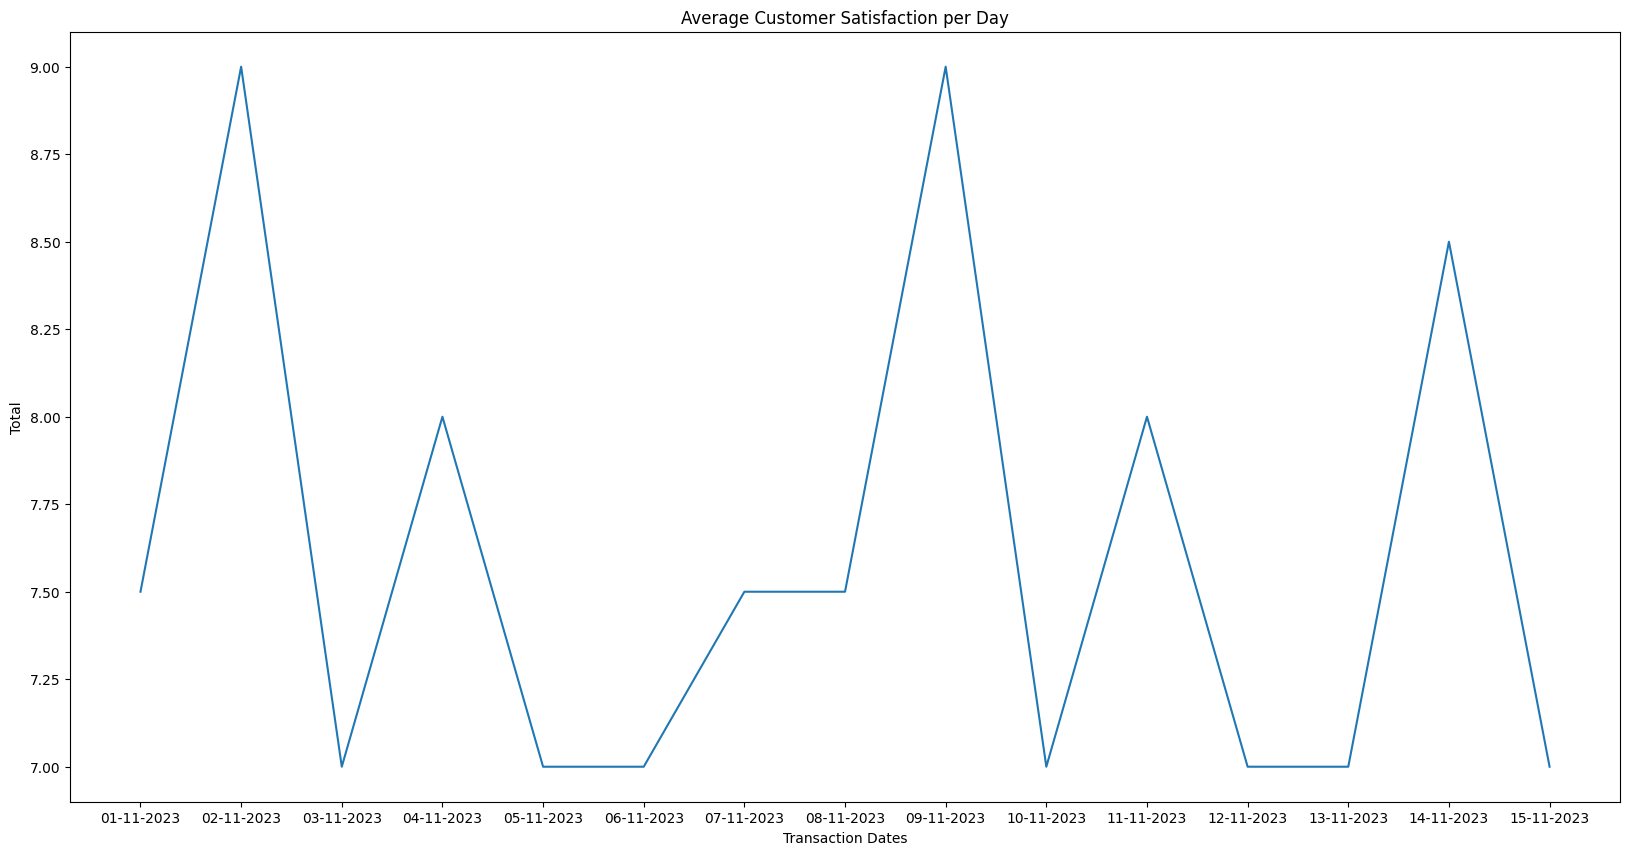

In [5]:
mean_transaction_date = df.groupby(["transaction_date"]).mean(numeric_only=True)
transaction_dates = mean_transaction_date.index.get_level_values(0).tolist()
rating_mean_counts = mean_transaction_date["customer_rating"]

plt.figure(figsize=(20, 10))
plt.title("Average Customer Satisfaction per Day")
plt.xlabel("Transaction Dates")
plt.ylabel("Total")
plt.plot(transaction_dates, rating_mean_counts)
plt.show()